In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#read in the dataset
df = pd.read_csv("C:/Users/Dell/Desktop/Projects/Python/Machine learning/Data/diabetes_data.csv")

In [3]:
#take a look at the data
print(df.head())

#check dataset size
df.shape

# Feature names
feature_names = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin','bmi','dpf','age']

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [4]:
#split data into inputs and targets
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
alpha = 0.1  # Regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [8]:
y_pred = lasso_model.predict(X_test_scaled)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.18430487893995584
R^2 Score: 0.19724986061708094


In [11]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
df_sorted = coefficients.sort_values(by='Coefficient',ascending=False)
df_sorted


,Feature,Coefficient
1,glucose,0.111512
5,bmi,0.022918
7,age,0.003295
0,pregnancies,0.000000
2,diastolic,0.000000
3,triceps,0.000000
4,insulin,0.000000
6,dpf,0.000000


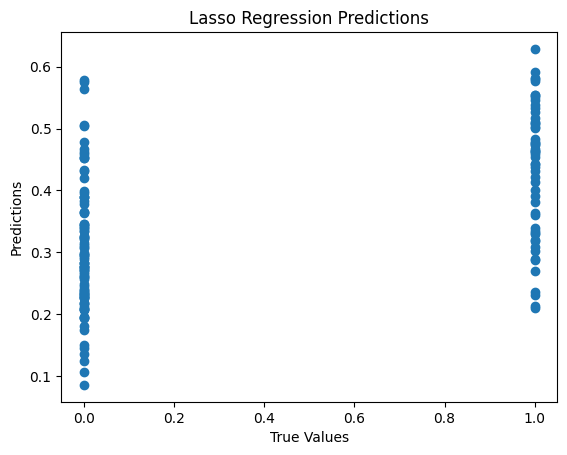

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression Predictions')
plt.show()